# Table of Content
* [1. Load Data](#1) 
* [2. Data Exploration](#2) 
  * [2.1 Pairplot](#2.1)
  * [2.2 Day of the week](#2.2)
  * [2.3 Month](#2.3)
  * [2.4 Hour](#2.4)
  * [2.5 Temperature](#2.5)
  * [2.6 Correlation Matrix](#2.6)
  * [2.7 Weather Over time](#2.7)
  * [2.8 Weather and temp](#2.8)
  * [2.9 Weather and bike demand](#2.9)
  * [2.10 Weather statistics](#2.10)
* [3. Feature Engineering](#3)
  * [3.1 Add](#3.1)
  * [3.2 Drop](#3.2)
  * [3.3 Modify](#3.3)
* [4. Split Data](#4)
* [5. Pipeline](#5)
  * [5.1 Numerical preprocessing pipeline](#5.1)
  * [5.2 Weather preprocessing pipeline](#5.2)
  * [5.3 Column Transformer](#5.3)
  * [5.4 Final Pipeline](#5.4)
* [6. Baseline](#6)
  * [6.1 RandomForest Baseline](#6.1)
  * [6.2 ExtraTrees Baseline](#6.2)
  * [6.3 Baseline Scores](#6.3)
* [7. Tune Models](#7)
  * [7.1 New Param Grid](#7.1)
  * [7.2 Train Tuned Model](#7.2)
  * [7.3 Prediction Results](#7.3)
  * [7.4 Plots](#7.4)

<a id='1'></a>

# 1. Load Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set_theme(context = "notebook", style="whitegrid")

In [7]:
df = pd.read_csv('hour.csv', index_col='instant')
df.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,
1,2011-01-01,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,3,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,4,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,0,1,1


- Turn dteday into datetime 

In [8]:
df['dteday'] = pd.to_datetime(df['dteday'])

<a id='2'></a>

# 2. Data Exploration

<a id='2.1'></a>
## 2.1 Pairplot 
- nothing too major
- temperature follows a sinusoidal pattern throughout the day
- temperature also follows a seasonal pattern 
- more counts in the middle of the day

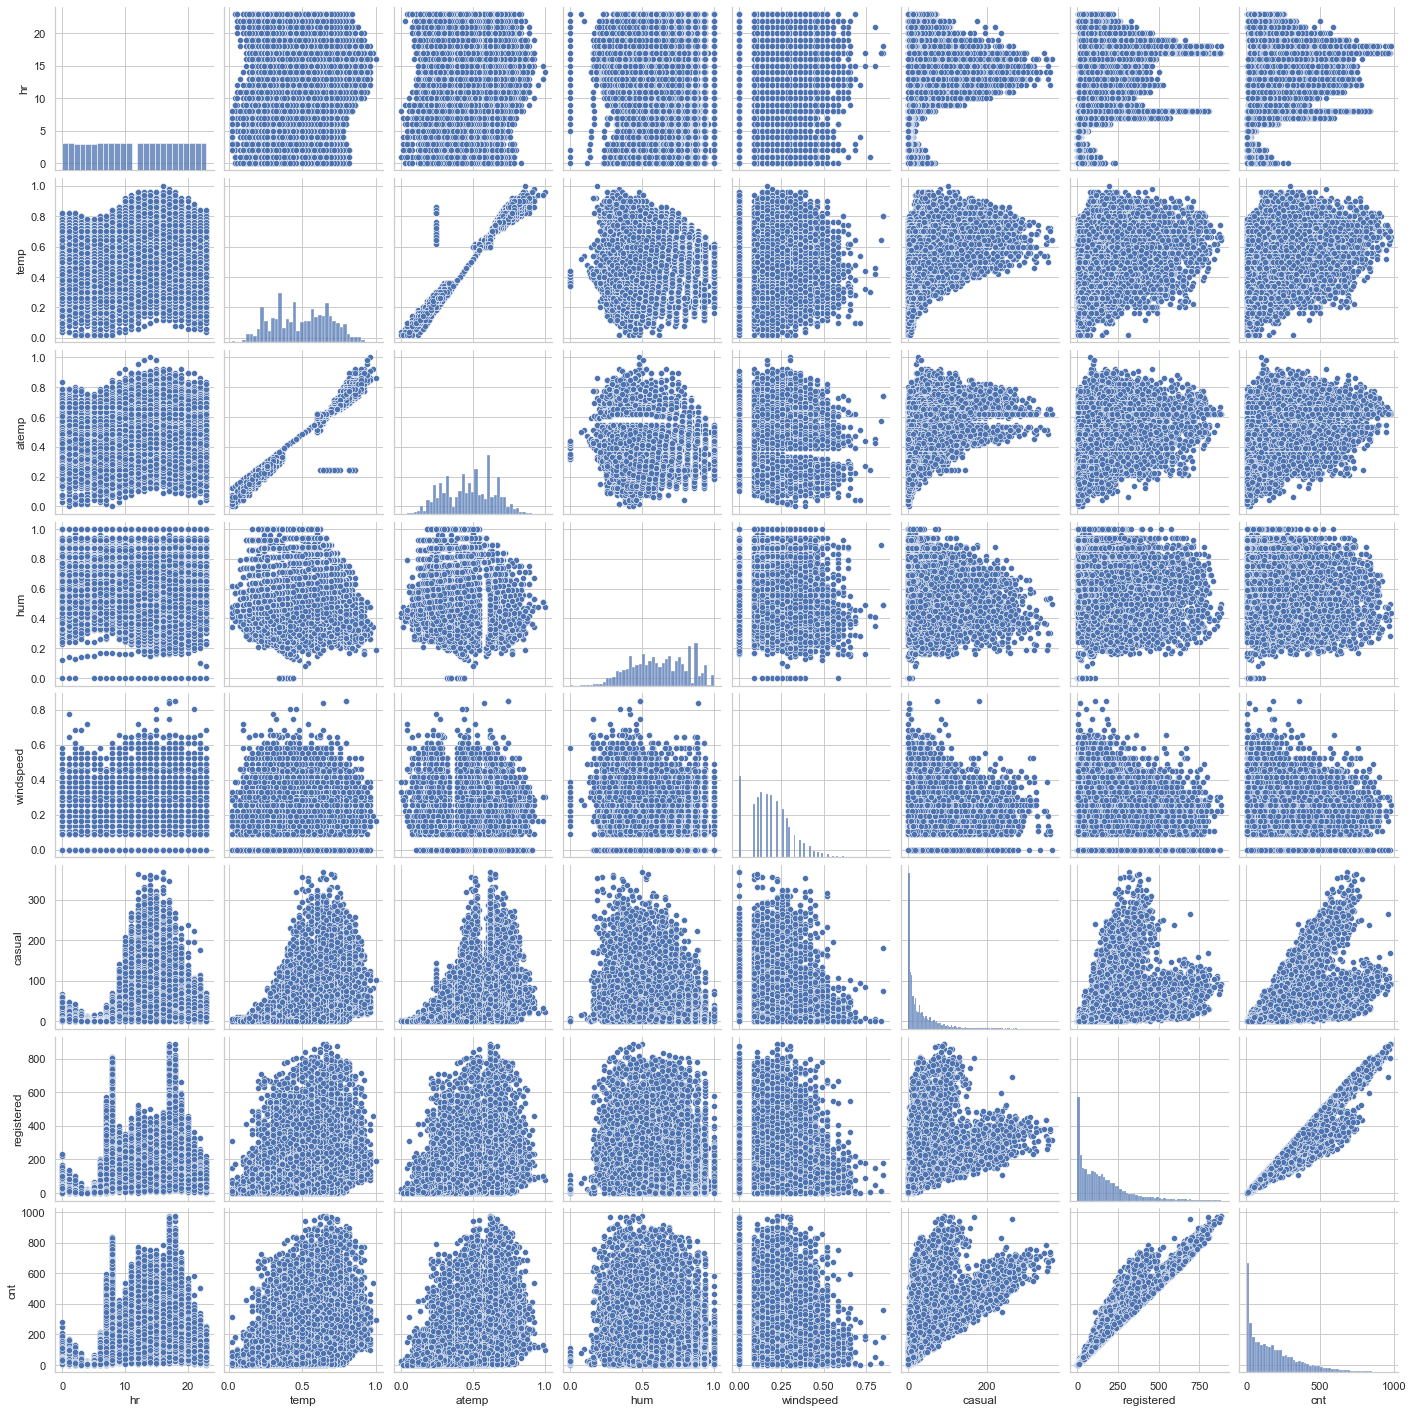

In [9]:
sns.pairplot(df)

<a id='2.2'></a>
## 2.2 Day of the week
- Weekend days 5 & 6 have a lower median and a smaller max
- Weekend days 5 & 6 have a slightly larger IQR
> meaning 
> - Day of the week has a slight impact on count

<AxesSubplot:xlabel='dteday', ylabel='cnt'>

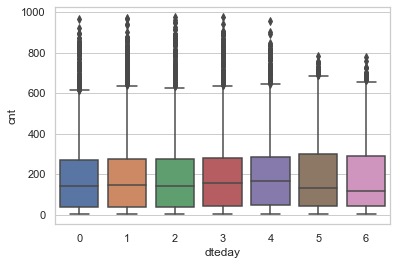

In [10]:
sns.boxplot(x=df['dteday'].dt.weekday, y=df['cnt'])

<a id='2.3'></a>
## 2.3 Month 
- Higher count values in the summer months, winter months have lower 
- Follows a sinusoidal pattern 
> meaning
> - month/season likely affect count
> - month 12 is closer in relation to month 1 than is to 9

<AxesSubplot:xlabel='dteday', ylabel='cnt'>

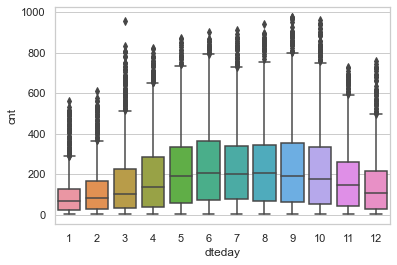

In [11]:
sns.boxplot(x=df['dteday'].dt.month, y=df['cnt'])

<a id='2.4'></a>
## 2.4 Hour of the day
- two big sets of rush hours between 7-9 and 17-19
- middle of the day has a bigger count value than at night
- Follows a sinusoidal pattern
> meaning 
> - hour of day has an impact on count
> - hour 23 is closer in value to 1 than is to 20

<AxesSubplot:xlabel='hr', ylabel='cnt'>

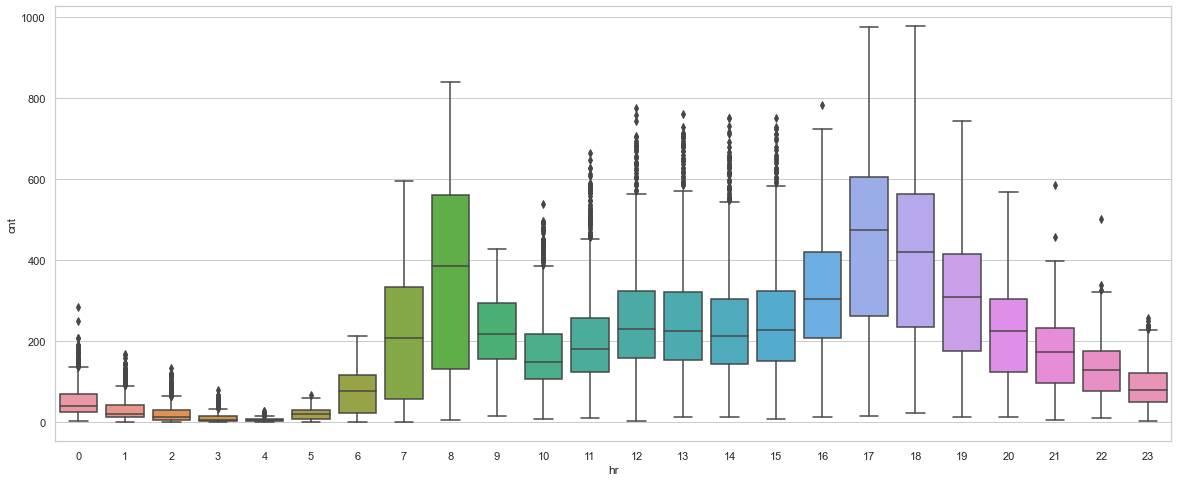

In [12]:
fig, ax =  plt.subplots(figsize=(20,8))
sns.boxplot(x=df['hr'], y=df['cnt'])

<a id='2.5'></a>
## 2.5 Temperature
- Temp and atemp relatively same
- lots of outliers in windspeed

<AxesSubplot:>

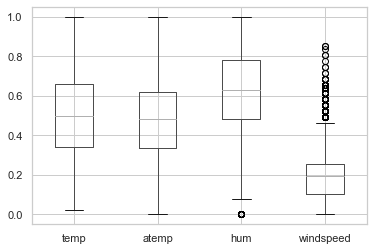

In [13]:
df[['temp', 'atemp', 'hum', 'windspeed']].boxplot()

<a id='2.6'></a>
## 2.6 Correlation matrix
- Humidity is correlated with almost all other variables
- atemp and temp are correlated
- rest other variables are relative

<AxesSubplot:>

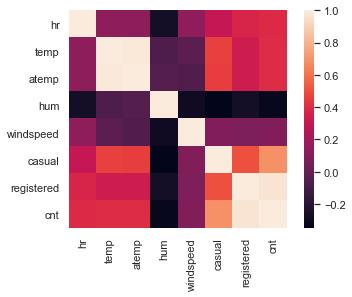

In [14]:
sns.heatmap(df.corr(), square=True)

<a id='2.7'></a>
## 2.7 Weather situation over time
- Temperature has a big impact on count, the trends are similar
- Humidity looks relatively constant throughout the year and/or doesn't look to impact count a whole lot
- Windspeed looks relatively constant throughout the year and/or doesn't look to impact count a whole lot

Text(0.5, 1.0, 'Weather metrics in over time compared to bike count')

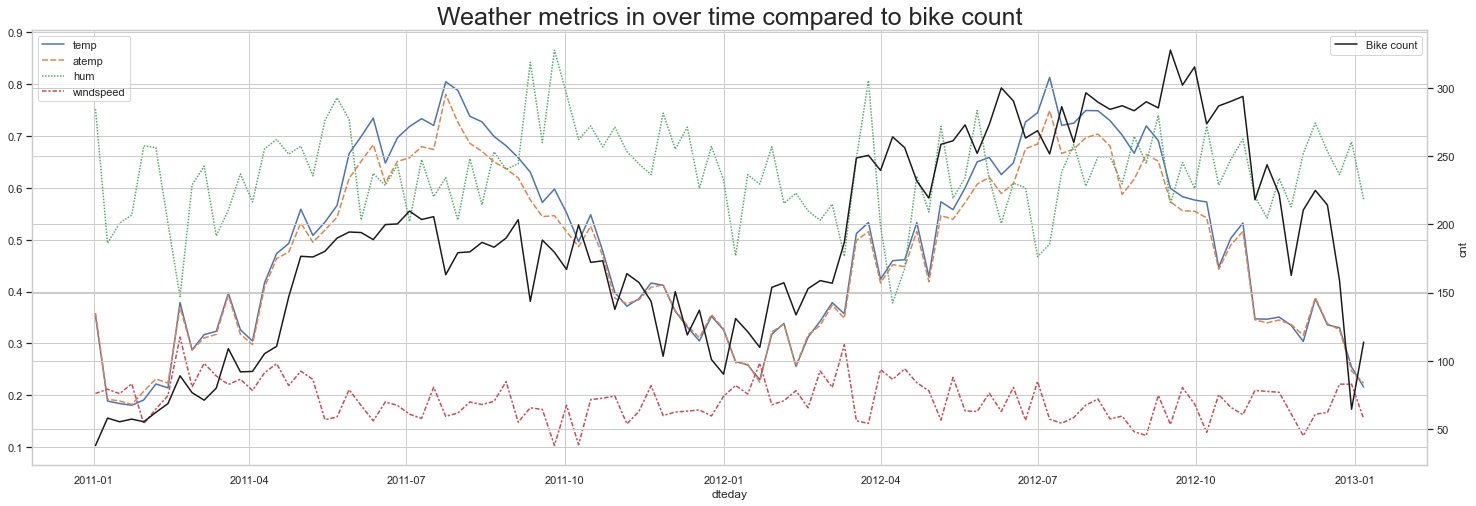

In [15]:
fig, ax = plt.subplots(figsize=(25,8))

# temporary df for resampled dataset (weekly mean)
temp_df = temp_df = df.set_index('dteday').resample('w').mean()

#First plot for weather metrics
sns.lineplot(data = temp_df[['temp', 'atemp', 'hum', 'windspeed']], ax=ax)

#Second plot for count on second axis
ax2 = ax.twinx()
sns.lineplot(data = temp_df['cnt'], color='k', ax=ax2, legend=True, label='Bike count')

#Move legend and set title
ax.legend(loc=2)
ax.set_title('Weather metrics in over time compared to bike count', fontsize=25)

<a id='2.8'></a>
## 2.8 Weather and temperature
- The worse the weather situation, the worse the temperature

<AxesSubplot:xlabel='weathersit', ylabel='temp'>

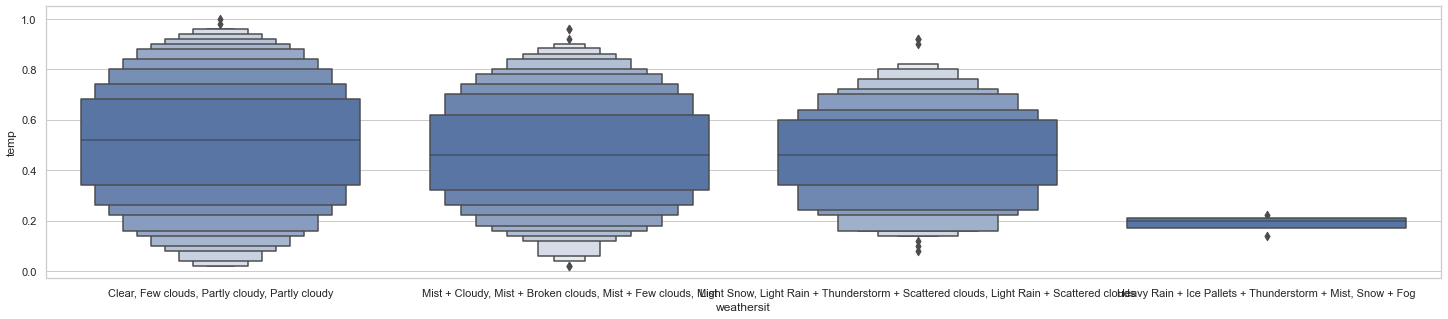

In [16]:
fig, ax = plt.subplots(figsize=(25,5))
sns.boxenplot(
    x="weathersit", 
    y="temp", 
    color="b", 
    scale="linear", 
    data=df, ax=ax
)

<a id='2.9'></a>
## 2.9 Weather and bike demand
- The larger the bubble, the higher the count
- Clear, few clouds, partly cloudy, is a big indicator that there will be high counts

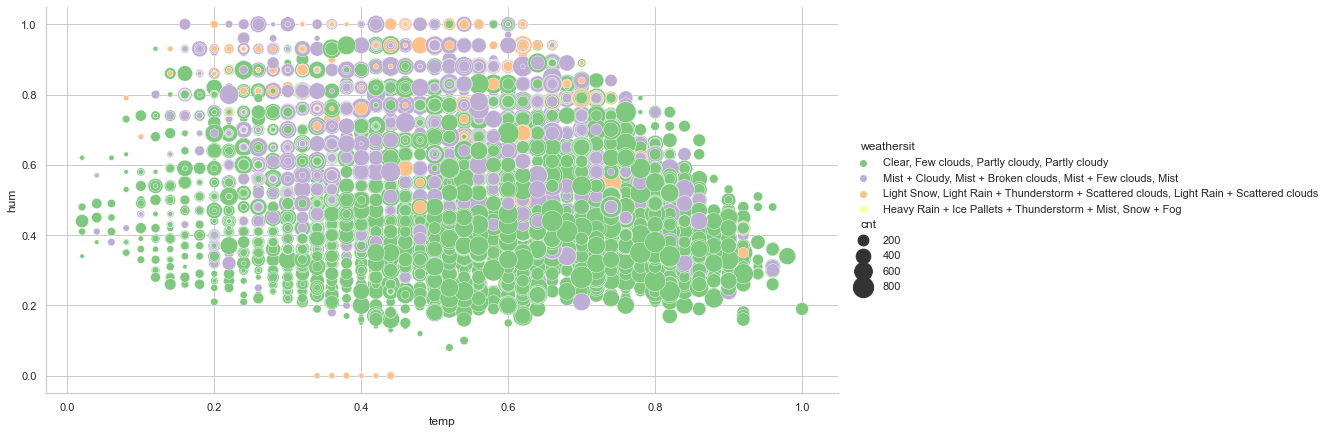

In [17]:
sns.relplot(
    x="temp", 
    y="hum", 
    hue='weathersit', 
    size="cnt", 
    sizes=(20, 500), 
    data=df, 
    palette='Accent', 
    height=6, 
    aspect=2
)

<a id='2.10'></a>
## 2.10 Weather statistics
- Only 5 values for weather situation, and most in one column
- OHE would work well for this pipeline

In [18]:
df['weathersit'].value_counts(dropna=False)

Clear, Few clouds, Partly cloudy, Partly cloudy                                            11345
Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                                4517
Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds     1414
NaN                                                                                          100
Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                     3
Name: weathersit, dtype: int64

In [19]:
df.describe()

,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17280.000000,17279.000000,17279.000000,17279.000000,17379.000000,17379.000000,17379.000000
mean,11.546752,0.497071,0.475530,0.627235,0.190114,35.676218,153.786869,189.463088
std,6.914405,0.192474,0.171782,0.193047,0.122378,49.305030,151.357286,181.387599
min,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


There are some null values as you can see below

In [20]:
df.isna().sum()

dteday          0
hr              0
weathersit    100
temp           99
atemp         100
hum           100
windspeed     100
casual          0
registered      0
cnt             0
dtype: int64

In [21]:
df.dtypes

dteday        datetime64[ns]
hr                     int64
weathersit            object
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

<a id='3'></a>
# 3. Feature Engineering

<a id='3.1'></a>
### 3.1 Create additional features

We could have done the following column creation in pipeline structure, but decided not to as it adds extra lines of code that appear relatively unnecessary. 
However, if we were to do pipeline, code would be as follows:
```
     def day_of_week(series):
         return series.dt.dayofweek.to_frame()
         
     from sklearn.preprocessing import FunctionTransformer
     dow = FunctionTransformer(day_of_week)
     df["weekday"] = dow.fit_transform(df["dteday"])
```

In [22]:
df['weekday']=df['dteday'].dt.dayofweek
df['month'] = df['dteday'].dt.month
df['day'] = df['dteday'].dt.day
df['year'] = df['dteday'].dt.year
df['weekend'] = np.where(df['day'].isin([5,6]), 1,0)
df['rushhour'] = np.where(df['hr'].isin([7,8,9,16,17,18,19]), 1,0)


month_to_season = {1:0, 2:0, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:3, 10:3, 11:3, 12:0}
df['season'] = df['dteday'].dt.month.map(month_to_season)

from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2011-01-01', end='2012-12-31').to_pydatetime()
df['holiday'] = np.where(df["dteday"].isin(holidays), 1, 0)

<a id='3.2'></a>
### 3.2 Drop columns

- We initially dropped "humidity", "temp", and "windspeed" because of their correlation (as seen in the correlation matrix above), but this lowered the r2 score
- contingent on the objective of the business, it might be better to remove to avoid overfitting
- for our purposes, we decided to keep the columns in for a higher r2

In [23]:
# drop "casual" and "registered" because these two columns add up to "count"

df.drop(columns=['casual', 'registered'], inplace=True)

<a id='3.3'></a>
### 3.3 Modify circular features with sine

In [24]:
# convert following columns into sine to follow patterns as found above

df["hr_sin"] = np.sin(df["hr"] / 24 * 2 * np.pi)
df["weekday_sin"] = np.sin(df["weekday"] / 7 * 2 * np.pi)
df["month_sin"] = np.sin(df["month"] / 12 * 2 * np.pi)

In [25]:
df.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,cnt,weekday,month,day,year,weekend,rushhour,season,holiday,hr_sin,weekday_sin,month_sin
instant,,,,,,,,,,,,,,,,,,,
1,2011-01-01,0,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.81,0.0,16,5,1,1,2011,0,0,0,0,0.000000,-0.974928,0.5
2,2011-01-01,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,40,5,1,1,2011,0,0,0,0,0.258819,-0.974928,0.5
3,2011-01-01,2,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.22,0.2727,0.80,0.0,32,5,1,1,2011,0,0,0,0,0.500000,-0.974928,0.5
4,2011-01-01,3,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,13,5,1,1,2011,0,0,0,0,0.707107,-0.974928,0.5
5,2011-01-01,4,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.24,0.2879,0.75,0.0,1,5,1,1,2011,0,0,0,0,0.866025,-0.974928,0.5


<a id='4'></a>
# 4. Split Data 
- Training data: whole 2011 and first 3 quarters of 2012.
- Test data: 4th quarter of 2012.

In [26]:
df_train = df[df['dteday'] < '2012-10']
df_test = df[df['dteday'] >= '2012-10']
df_train.tail()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,cnt,weekday,month,day,year,weekend,rushhour,season,holiday,hr_sin,weekday_sin,month_sin
instant,,,,,,,,,,,,,,,,,,,
15207,2012-09-30,19,"Light Snow, Light Rain + Thunderstorm + Scatte...",0.50,0.4848,0.72,0.1343,257,6,9,30,2012,0,1,3,0,-0.965926,-0.781831,-1.0
15208,2012-09-30,20,"Light Snow, Light Rain + Thunderstorm + Scatte...",0.50,0.4848,0.72,0.1343,194,6,9,30,2012,0,0,3,0,-0.866025,-0.781831,-1.0
15209,2012-09-30,21,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.50,0.4848,0.68,0.0000,123,6,9,30,2012,0,0,3,0,-0.707107,-0.781831,-1.0
15210,2012-09-30,22,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.48,0.4697,0.72,0.0000,91,6,9,30,2012,0,0,3,0,-0.500000,-0.781831,-1.0
15211,2012-09-30,23,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.48,0.4697,0.72,0.0896,57,6,9,30,2012,0,0,3,0,-0.258819,-0.781831,-1.0


In [27]:
X_train = df_train.drop(columns=['cnt', 'dteday'])
y_train = df_train['cnt']
X_test = df_test.drop(columns=['cnt', 'dteday'])
y_test = df_test['cnt']

<a id='5'></a>
# 5. Pipeline

In [28]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.impute import KNNImputer, SimpleImputer
import sklearn
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import TimeSeriesSplit

In [29]:
sklearn.set_config(display='diagram')

<a id='5.1'></a>
### 5.1 Numerical preprocessing pipeline

We decided to impute the numerical null values by the median, being more robust than the mean to outliers.

In [30]:
numerical_preprocessing = make_pipeline(
    RobustScaler(),
    SimpleImputer(strategy='median'),
)
numerical_preprocessing

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('simpleimputer', SimpleImputer(strategy='median'))])

<a id='5.2'></a>
### 5.2 Weather preprocessing pipeline

We decided to impute the categorical null values by the most frequent value because it is efficient.

In [31]:
weather_preprocessing = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)
weather_preprocessing

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

<a id='5.3'></a>
### 5.3 Column Transformer
- Add OHE for dates on the fly, bring weather, and numerical altogether

In [32]:
ct = ColumnTransformer([
    ("Dates", OneHotEncoder(sparse=False, handle_unknown="ignore"),
                                        ["hr", "weekday", "month", "day", "season", "weekend", "rushhour", 'year']),
    ("Weather", weather_preprocessing, ["weathersit"]),
    ("Numbers", numerical_preprocessing, make_column_selector(dtype_include="number"))
])
ct

ColumnTransformer(transformers=[('Dates',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['hr', 'weekday', 'month', 'day', 'season',
                                  'weekend', 'rushhour', 'year']),
                                ('Weather',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['weathersit']),
                                ('Numbers',
                                 Pipeline(steps=[('robustscaler',
                                                  RobustScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x11e125d30>)])

<a id='5.4'></a>
### 5.4 Final Pipeline bringing altogether with model

In [33]:
reg = Pipeline([
    ('Preproccessing',ct),
    ('Model', RandomForestRegressor())
])
reg

Pipeline(steps=[('Preproccessing',
                 ColumnTransformer(transformers=[('Dates',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['hr', 'weekday', 'month',
                                                   'day', 'season', 'weekend',
                                                   'rushhour', 'year']),
                                                 ('Weather',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['weathersit']),
                                                 ('Numbers',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x11e125d30>)])),
                ('Model', RandomForestRegressor())])

<a id='6'></a>
# 6. Baseline Model

In [34]:
# get param keys to be able to define param grid
reg.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'Preproccessing', 'Model', 'Preproccessing__n_jobs', 'Preproccessing__remainder', 'Preproccessing__sparse_threshold', 'Preproccessing__transformer_weights', 'Preproccessing__transformers', 'Preproccessing__verbose', 'Preproccessing__Dates', 'Preproccessing__Weather', 'Preproccessing__Numbers', 'Preproccessing__Dates__categories', 'Preproccessing__Dates__drop', 'Preproccessing__Dates__dtype', 'Preproccessing__Dates__handle_unknown', 'Preproccessing__Dates__sparse', 'Preproccessing__Weather__memory', 'Preproccessing__Weather__steps', 'Preproccessing__Weather__verbose', 'Preproccessing__Weather__simpleimputer', 'Preproccessing__Weather__onehotencoder', 'Preproccessing__Weather__simpleimputer__add_indicator', 'Preproccessing__Weather__simpleimputer__copy', 'Preproccessing__Weather__simpleimputer__fill_value', 'Preproccessing__Weather__simpleimputer__missing_values', 'Preproccessing__Weather__simpleimputer__strategy', 'Preproccessing__Weather__simple

In [35]:
# time series split
# traditional CV such as k-fold is the not the best because it assumes that the data points are IID data
# which is not true in time series
tss = TimeSeriesSplit(n_splits=8)

<a id='6.1'></a>
## 6.1 RandomForest Baseline

In [36]:
pg_base_rf = [{"Model": [RandomForestRegressor(random_state=42, n_jobs=-1)]}]
gs_base_rf = GridSearchCV(reg, param_grid=pg_base_rf, n_jobs=-1, cv=tss)
gs_base_rf

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=8, test_size=None),
             estimator=Pipeline(steps=[('Preproccessing',
                                        ColumnTransformer(transformers=[('Dates',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['hr',
                                                                          'weekday',
                                                                          'month',
                                                                          'day',
                                                                          'season',
                                                                          'weekend',
                                                                          'rushhour',
                                                                          'year']),
                                                                        ('Weather',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(s...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['weathersit']),
                                                                        ('Numbers',
                                                                         Pipeline(steps=[('robustscaler',
                                                                                          RobustScaler()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x11e125d30>)])),
                                       ('Model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid=[{'Model': [RandomForestRegressor(n_jobs=-1,
                                                          random_state=42)]}])

In [37]:
gs_base_rf.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=8, test_size=None),
             estimator=Pipeline(steps=[('Preproccessing',
                                        ColumnTransformer(transformers=[('Dates',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['hr',
                                                                          'weekday',
                                                                          'month',
                                                                          'day',
                                                                          'season',
                                                                          'weekend',
                                                                          'rushhour',
                                                                          'year']),
                                                                        ('Weather',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(s...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['weathersit']),
                                                                        ('Numbers',
                                                                         Pipeline(steps=[('robustscaler',
                                                                                          RobustScaler()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x11e125d30>)])),
                                       ('Model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid=[{'Model': [RandomForestRegressor(n_jobs=-1,
                                                          random_state=42)]}])

<a id='6.2'></a>
## 6.2 ExtraTrees Baseline

In [38]:
pg_base_et = [{"Model": [ExtraTreesRegressor(random_state=42, n_jobs=-1)]}]
gs_base_et = GridSearchCV(reg, param_grid=pg_base_et, n_jobs=-1, cv=tss)
gs_base_et

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=8, test_size=None),
             estimator=Pipeline(steps=[('Preproccessing',
                                        ColumnTransformer(transformers=[('Dates',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['hr',
                                                                          'weekday',
                                                                          'month',
                                                                          'day',
                                                                          'season',
                                                                          'weekend',
                                                                          'rushhour',
                                                                          'year']),
                                                                        ('Weather',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(s...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['weathersit']),
                                                                        ('Numbers',
                                                                         Pipeline(steps=[('robustscaler',
                                                                                          RobustScaler()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x11e125d30>)])),
                                       ('Model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid=[{'Model': [ExtraTreesRegressor(n_jobs=-1,
                                                        random_state=42)]}])

In [39]:
gs_base_et.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=8, test_size=None),
             estimator=Pipeline(steps=[('Preproccessing',
                                        ColumnTransformer(transformers=[('Dates',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['hr',
                                                                          'weekday',
                                                                          'month',
                                                                          'day',
                                                                          'season',
                                                                          'weekend',
                                                                          'rushhour',
                                                                          'year']),
                                                                        ('Weather',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(s...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['weathersit']),
                                                                        ('Numbers',
                                                                         Pipeline(steps=[('robustscaler',
                                                                                          RobustScaler()),
                                                                                         ('simpleimputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x11e125d30>)])),
                                       ('Model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid=[{'Model': [ExtraTreesRegressor(n_jobs=-1,
                                                        random_state=42)]}])

<a id='6.3'></a>
## 6.3 Baseline Scores

In [40]:
# Scores to beat, with tuning
print(gs_base_rf.best_score_, gs_base_et.best_score_)

0.7415408533855995 0.7330499843082194


In [41]:
y_pred_base_rf = gs_base_rf.best_estimator_.predict(X_test)
r2_rf = r2_score(y_test, y_pred_base_rf)

In [42]:
y_pred_base_et = gs_base_et.best_estimator_.predict(X_test)
r2_et = r2_score(y_test, y_pred_base_et)

In [73]:
print(f"The scores to beat: random forest: {r2_rf:.4f}, extra trees: {r2_et:.4f}")

The scores to beat: random forest: 0.8567, extra trees: 0.8636


<a id='7'></a>
# 7. Tune Model

<a id='7.1'></a>
## 7.1 New Param Grid

Try 4 different models (assuming RF would be better, but test a few different models)
1. RF with simple imputer
2. RF with KNN Imputer
3. ET with KNN Imputer
4. ET with simple Imputer

In [44]:
param_grid = [
    { 
        "Model": [RandomForestRegressor(random_state=42, n_jobs=-1)],
        "Preproccessing__Numbers__simpleimputer__n_neighbors": [5,6], 
        "Preproccessing__Numbers__simpleimputer": [KNNImputer()],
        'Model__max_features' : ['auto', 'sqrt'], 
        'Model__n_estimators' : np.linspace(10,200,6).astype(int)
    },
    {
        "Model": [RandomForestRegressor(random_state=42, n_jobs=-1)],
        "Preproccessing__Numbers__simpleimputer__strategy": ['mean', 'median'],
        "Preproccessing__Numbers__simpleimputer": [SimpleImputer()],
        'Model__max_features' : ['auto', 'sqrt'], 
        'Model__n_estimators' : np.linspace(10,200,6).astype(int)
    }, 
    { 
        "Model": [ExtraTreesRegressor(random_state=42, n_jobs=-1)],
        "Preproccessing__Numbers__simpleimputer__n_neighbors": [5,6], 
        "Preproccessing__Numbers__simpleimputer": [KNNImputer()],
        'Model__max_features' : ['auto', 'sqrt'], 
        'Model__n_estimators' : np.linspace(10,200,6).astype(int),
        "Model__max_depth" : np.linspace(1, 50, 3).astype(int)

    },
    {
        "Model": [ExtraTreesRegressor(random_state=42, n_jobs=-1)],
        "Preproccessing__Numbers__simpleimputer__strategy": ['mean', 'median'],
        "Preproccessing__Numbers__simpleimputer": [SimpleImputer()],
        'Model__max_features' : ['auto', 'sqrt'], 
        'Model__n_estimators' : np.linspace(10,200,6).astype(int),
        "Model__max_depth": np.linspace(1,50,3).astype(int)
    } 
]
param_grid

[{'Model': [RandomForestRegressor(n_jobs=-1, random_state=42)],
  'Preproccessing__Numbers__simpleimputer__n_neighbors': [5, 6],
  'Preproccessing__Numbers__simpleimputer': [KNNImputer()],
  'Model__max_features': ['auto', 'sqrt'],
  'Model__n_estimators': array([ 10,  48,  86, 124, 162, 200])},
 {'Model': [RandomForestRegressor(n_jobs=-1, random_state=42)],
  'Preproccessing__Numbers__simpleimputer__strategy': ['mean', 'median'],
  'Preproccessing__Numbers__simpleimputer': [SimpleImputer()],
  'Model__max_features': ['auto', 'sqrt'],
  'Model__n_estimators': array([ 10,  48,  86, 124, 162, 200])},
 {'Model': [ExtraTreesRegressor(n_jobs=-1, random_state=42)],
  'Preproccessing__Numbers__simpleimputer__n_neighbors': [5, 6],
  'Preproccessing__Numbers__simpleimputer': [KNNImputer()],
  'Model__max_features': ['auto', 'sqrt'],
  'Model__n_estimators': array([ 10,  48,  86, 124, 162, 200]),
  'Model__max_depth': array([ 1, 25, 50])},
 {'Model': [ExtraTreesRegressor(n_jobs=-1, random_state=

In [45]:
gs = GridSearchCV(reg, param_grid=param_grid, n_jobs=-1, cv=tss)
gs

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=8, test_size=None),
             estimator=Pipeline(steps=[('Preproccessing',
                                        ColumnTransformer(transformers=[('Dates',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['hr',
                                                                          'weekday',
                                                                          'month',
                                                                          'day',
                                                                          'season',
                                                                          'weekend',
                                                                          'rushhour',
                                                                          'year']),
                                                                        ('Weather',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(s...
                          'Preproccessing__Numbers__simpleimputer__n_neighbors': [5,
                                                                                  6]},
                         {'Model': [ExtraTreesRegressor(n_jobs=-1,
                                                        random_state=42)],
                          'Model__max_depth': array([ 1, 25, 50]),
                          'Model__max_features': ['auto', 'sqrt'],
                          'Model__n_estimators': array([ 10,  48,  86, 124, 162, 200]),
                          'Preproccessing__Numbers__simpleimputer': [SimpleImputer()],
                          'Preproccessing__Numbers__simpleimputer__strategy': ['mean',
                                                                               'median']}])

<a id='7.2'></a>
## 7.2 Train Tuned Model!

In [46]:
gs.fit(X_train, y_train)
gs.best_score_

0.742967776899466

In [47]:
gs.best_estimator_

Pipeline(steps=[('Preproccessing',
                 ColumnTransformer(transformers=[('Dates',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['hr', 'weekday', 'month',
                                                   'day', 'season', 'weekend',
                                                   'rushhour', 'year']),
                                                 ('Weather',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['weathersit']),
                                                 ('Numbers',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler()),
                                                                  ('simpleimputer',
                                                                   KNNImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1221e17c0>)])),
                ('Model',
                 RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                       random_state=42))])

<a id='7.3'></a>
## 7.3 Prediction Results

In [48]:
gs.best_score_

0.742967776899466

In [49]:
results = pd.DataFrame(gs.cv_results_).sort_values("rank_test_score")
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Model,param_Model__max_features,param_Model__n_estimators,param_Preproccessing__Numbers__simpleimputer,param_Preproccessing__Numbers__simpleimputer__n_neighbors,param_Preproccessing__Numbers__simpleimputer__strategy,...,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,mean_test_score,std_test_score,rank_test_score
10,26.049555,14.903032,0.145638,0.041239,"RandomForestRegressor(n_estimators=200, n_jobs...",auto,200,KNNImputer(),5,NaN,...,0.863384,0.869576,0.799159,0.411379,0.729543,0.859487,0.918924,0.742968,0.177199,1
35,26.897893,15.362779,0.116801,0.020331,"RandomForestRegressor(n_jobs=-1, random_state=42)",auto,200,SimpleImputer(),NaN,median,...,0.858226,0.869653,0.799678,0.418315,0.730324,0.858911,0.921576,0.742961,0.176412,2
11,25.164666,14.347016,0.158264,0.054911,"RandomForestRegressor(n_estimators=200, n_jobs...",auto,200,KNNImputer(),6,NaN,...,0.861995,0.869542,0.798329,0.413244,0.730412,0.860901,0.919724,0.742944,0.177333,3
34,26.980658,15.725886,0.095618,0.014128,"RandomForestRegressor(n_jobs=-1, random_state=42)",auto,200,SimpleImputer(),NaN,mean,...,0.859557,0.868939,0.795005,0.418113,0.731058,0.860512,0.922768,0.742754,0.176769,4
9,22.452981,13.077530,0.165283,0.074017,"RandomForestRegressor(n_estimators=200, n_jobs...",auto,162,KNNImputer(),6,NaN,...,0.863654,0.868625,0.798600,0.411837,0.729535,0.860392,0.919937,0.742676,0.177824,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.320009,0.051943,0.089471,0.025333,"ExtraTreesRegressor(n_jobs=-1, random_state=42)",sqrt,10,SimpleImputer(),NaN,median,...,-0.121316,0.092936,0.212144,0.156737,-0.092169,-0.113014,-0.099134,-0.020749,0.142061,188
69,0.987254,0.491888,0.174069,0.037099,"ExtraTreesRegressor(n_jobs=-1, random_state=42)",sqrt,162,KNNImputer(),6,NaN,...,-0.163385,0.076590,0.217022,0.193300,-0.076671,-0.103929,-0.088372,-0.021011,0.153114,189
68,0.996200,0.434081,0.154524,0.058448,"ExtraTreesRegressor(n_jobs=-1, random_state=42)",sqrt,162,KNNImputer(),5,NaN,...,-0.163391,0.076577,0.217019,0.193301,-0.076669,-0.103908,-0.088381,-0.021012,0.153112,190
141,0.750298,0.156908,0.103919,0.024753,"ExtraTreesRegressor(n_jobs=-1, random_state=42)",sqrt,162,SimpleImputer(),NaN,median,...,-0.163950,0.076313,0.217023,0.193373,-0.076718,-0.104064,-0.088519,-0.021158,0.153203,191


In [50]:
results_df = results[
        ["param_Model__n_estimators", 
         "param_Model",
         "param_Model__max_features",
         "mean_test_score",
         "std_test_score"
        ]
    ].rename(
        columns={
            "param_Model__n_estimators":"n_estimators",
            "param_Model__max_features": "max_features", 
            "param_Model": "Model"
        }
    )

results_df = results_df[results_df['mean_test_score'] > 0.6]

In [57]:
results_df.head()

,n_estimators,Model,max_features,mean_test_score,std_test_score
10,200,RandomForestRegressor,auto,0.742968,0.177199
35,200,RandomForestRegressor,auto,0.742961,0.176412
11,200,RandomForestRegressor,auto,0.742944,0.177333
34,200,RandomForestRegressor,auto,0.742754,0.176769
9,162,RandomForestRegressor,auto,0.742676,0.177824


In [51]:
results_df["Model"] = results_df["Model"].apply(lambda x: type(x).__name__)

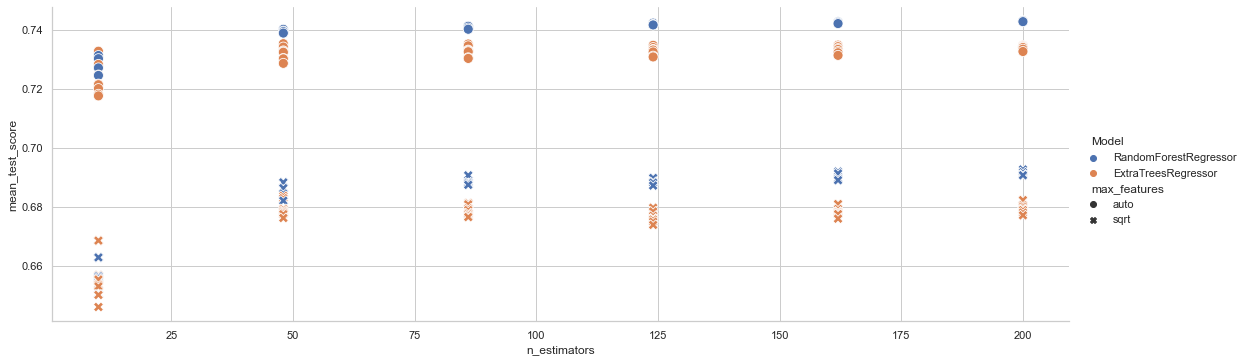

In [52]:
sns.relplot(x="n_estimators", 
            y="mean_test_score", 
            hue='Model', 
            style="max_features",
            aspect=3,
            s=100,
            data=results_df)

As we can see the best model is always RandomForest, while including all features and a higher number of trees is better.

In [53]:
gs.best_estimator_

Pipeline(steps=[('Preproccessing',
                 ColumnTransformer(transformers=[('Dates',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['hr', 'weekday', 'month',
                                                   'day', 'season', 'weekend',
                                                   'rushhour', 'year']),
                                                 ('Weather',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['weathersit']),
                                                 ('Numbers',
                                                  Pipeline(steps=[('robustscaler',
                                                                   RobustScaler()),
                                                                  ('simpleimputer',
                                                                   KNNImputer())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1221e17c0>)])),
                ('Model',
                 RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                       random_state=42))])

In [59]:
gs.best_params_

{'Model': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42),
 'Model__max_features': 'auto',
 'Model__n_estimators': 200,
 'Preproccessing__Numbers__simpleimputer': KNNImputer(),
 'Preproccessing__Numbers__simpleimputer__n_neighbors': 5}

With this final model, we can predict the test set

In [62]:
y_pred = gs.best_estimator_.predict(X_test)
r2 = r2_score(y_test, y_pred)

In [74]:
print(f'The tuned random forest model achieved an R2 of {r2:.5f}')

The tuned random forest model achieved an R2 of 0.85798


Applying gridsearch to find the best hyperparameters didn't end up giving us a significantly better score

<a id='7.4'></a>
## 7.4 Plots

<AxesSubplot:label='a05c28c7-31d7-4d4d-8016-2e1d40e9b490', ylabel='Density'>

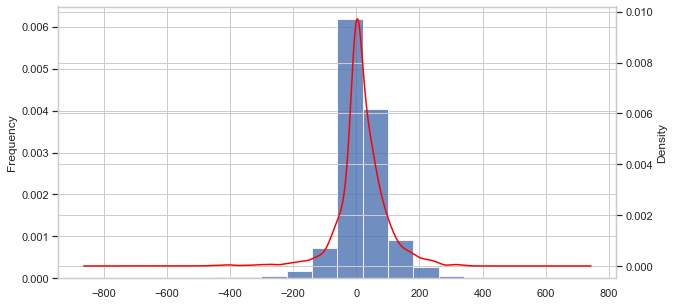

In [55]:
residuals = y_test-y_pred

fig, ax = plt.subplots(figsize=(10,5))
residuals.plot.hist(
    ax=ax, 
    density=True, 
    label='Horizontal', 
    alpha=0.8
)
ax_kde=ax.twinx()
residuals.plot.kde(
    ax=ax_kde, 
    c='red'
)

Residuals are pretty normal and very close to zero which means it is a reliable model

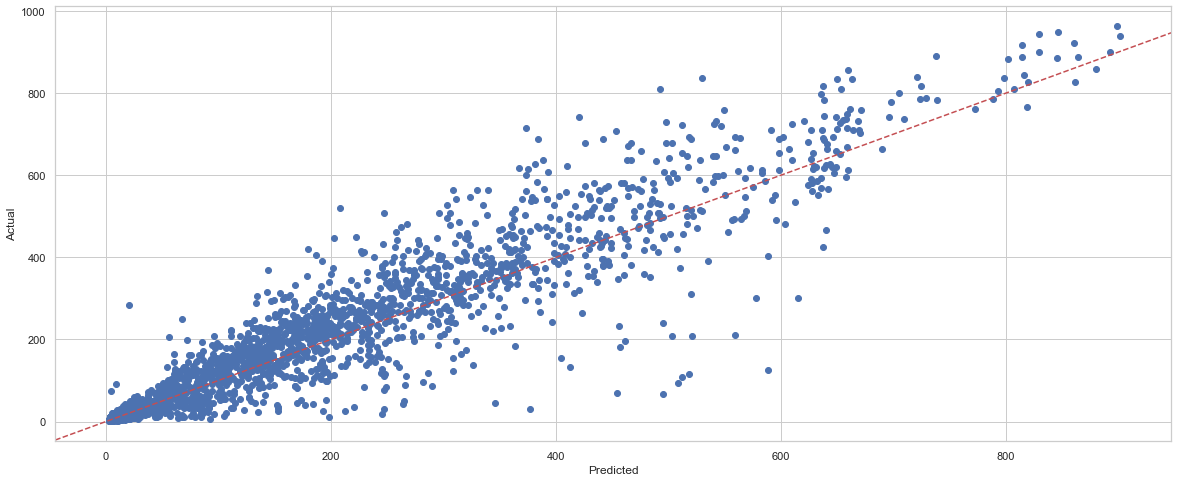

In [56]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(x=y_pred, y=y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax.axline([0, 0], [1, 1], c='r', linestyle='--')

Plotting the residuals against the actual values shows a pretty good prediction.
Although the model sometimes predicts a lot higher than the actual values (see area under the line from 200 to 600)

Despite our best efforts in tuning, we do not beat the standard ExtraTrees baseline model. Perhaps this means we feature engineered well and nothing else needed to be done!